# **Team Nikhil Chandan**

## **Importing necessary packages & Loading the data**

In [34]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### **loading the data**

In [35]:
!gdown --id 1AZSBLG_imF1NYGlSIzS4E63ijSXR6-Ma

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1AZSBLG_imF1NYGlSIzS4E63ijSXR6-Ma
To: /content/Train Dataset.csv
100% 1.32M/1.32M [00:00<00:00, 112MB/s]


In [36]:
td = pd.read_csv('Train Dataset.csv')

## **Part I**

**Data Description**

In [37]:
td.head()

,cas,DTXSID,Chemical_Name,cid,LD50_mgkg,test_type,XLogP,Mwt,ExactMass,MonoisotopicMass,...,FeatureCationCount3D,Volume3D,XStericQuadrupole3D,YStericQuadrupole3D,ZStericQuadrupole3D,FeatureCount3D,FeatureAcceptorCount3D,FeatureDonorCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D
0,1746-01-6,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",15625,0.020,point estimate,6.4,322.00,321.893590,319.896540,...,0.0,207.3,11.27,2.08,0.62,5.0,2.0,0.0,0.6,0.4
1,50585-41-6,DTXSID6073524,"2,3,7,8-Tetrabromodibenzo-p-dioxin",39729,0.100,point estimate,6.7,499.77,499.690380,495.694480,...,0.0,230.4,12.30,2.26,0.64,9.0,2.0,0.0,0.6,0.4
2,62-74-8,DTXSID8024311,Sodium fluoroacetate,6123,0.100,point estimate,NaN,100.02,99.993652,99.993652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2885-39-4,NaN,NaN,233768,0.158,point estimate,-0.1,339.40,339.168187,339.168187,...,0.0,255.6,9.56,3.02,1.76,9.0,5.0,2.0,1.0,6.8
4,56073-10-0,DTXSID5032529,Brodifacoum,54680676,0.160,point estimate,7.6,523.40,522.083060,522.083060,...,0.0,384.8,23.64,5.06,1.76,9.0,1.0,1.0,0.8,3.8


In [38]:
td = td.drop(columns = ['DTXSID', 'Chemical_Name', 'test_type', 'cas', 'cid'])

**Question 1**

In [39]:
td.describe()

,LD50_mgkg,XLogP,Mwt,ExactMass,MonoisotopicMass,TPSA,Complexity,FeatureRingCount3D,FeatureHydrophobeCount3D,Charge,...,FeatureCationCount3D,Volume3D,XStericQuadrupole3D,YStericQuadrupole3D,ZStericQuadrupole3D,FeatureCount3D,FeatureAcceptorCount3D,FeatureDonorCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D
count,7000.000000,6583.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,6500.000000,6500.000000,7000.000000,...,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000,6500.000000
mean,2470.373826,2.500658,250.218473,249.859237,249.773205,54.736271,275.844857,1.544400,0.563077,-0.005857,...,0.398215,178.302572,7.845673,2.396053,1.057695,5.280400,1.774523,0.734092,0.617951,3.710314
std,4034.826558,2.070199,117.560608,117.427873,117.305952,40.552592,202.934416,1.248575,0.899801,0.172705,...,0.660705,68.531230,4.346574,1.144177,0.417607,2.944319,1.457327,0.935423,0.159168,2.172089
min,0.020000,-6.300000,16.043000,16.031300,16.031300,0.000000,0.000000,0.000000,0.000000,-4.000000,...,0.000000,20.600000,0.620000,0.550000,0.530000,0.000000,0.000000,0.000000,0.400000,0.000000
25%,311.000000,1.200000,167.190000,167.049147,167.019841,26.300000,135.000000,1.000000,0.000000,0.000000,...,0.000000,126.800000,4.699000,1.540000,0.710000,3.000000,1.000000,0.000000,0.600000,2.000000
50%,1190.000000,2.400000,235.085000,234.203982,234.185789,46.500000,241.500000,1.000000,0.000000,0.000000,...,0.000000,171.050000,7.040000,2.130000,0.980000,5.000000,2.000000,0.400000,0.600000,4.000000
75%,3000.000000,3.600000,314.310000,313.903518,313.166451,73.400000,374.000000,2.000000,1.000000,0.000000,...,1.000000,224.005000,10.000000,3.028500,1.280000,7.000000,2.200000,1.000000,0.800000,5.280000
max,70000.000000,21.500000,2341.300000,2339.927542,2338.924187,922.000000,5240.000000,9.000000,10.000000,4.000000,...,4.000000,503.300000,45.020000,9.680000,3.910000,23.000000,12.000000,8.000000,1.400000,8.000000


**Question 2**

**Counting NA values in target and predictor variables**

In [40]:
print(td.isnull().sum())

LD50_mgkg                     0
XLogP                       417
Mwt                           0
ExactMass                     0
MonoisotopicMass              0
TPSA                          0
Complexity                    0
FeatureRingCount3D          500
FeatureHydrophobeCount3D    500
Charge                        0
HBondAcceptorCount            0
HBondDonorCount               0
RotatableBondCount            0
HeavyAtomCount                0
IsotopeAtomCount              0
AtomStereoCount               0
DefinedAtomStereoCount        0
UndefinedAtomStereoCount      0
BondStereoCount               0
DefinedBondStereoCount        0
UndefinedBondStereoCount      0
CovalentUnitCount             0
ConformerCount3D              0
FeatureAnionCount3D         500
FeatureCationCount3D        500
Volume3D                    500
XStericQuadrupole3D         500
YStericQuadrupole3D         500
ZStericQuadrupole3D         500
FeatureCount3D              500
FeatureAcceptorCount3D      500
FeatureD

**Replacing NA values in each variable with the mean value of the respective varaible**

In [41]:
td = td.fillna(td.mean())

**Question 3**

**Category Division**

In [42]:
td.insert(1, 'Category', value = 1)

In [43]:
conditions = [
              (td['LD50_mgkg'] <= 1), 
              (td['LD50_mgkg'] > 1) & (td['LD50_mgkg'] <= 50), 
              (td['LD50_mgkg'] > 50) & (td['LD50_mgkg'] <= 500), 
              (td['LD50_mgkg'] > 500) & (td['LD50_mgkg'] <= 5000),
              (td['LD50_mgkg'] > 5000) & (td['LD50_mgkg'] <= 15000),
              (td['LD50_mgkg'] > 15000)
              ]
values = ['Extremely toxic', 'Highly toxic', 'Moderately toxic', 'Slightly toxic', 'Practically non-toxic', 'Relatively harmless']
td['Category'] = np.select(conditions, values)

In [44]:
td.head()

,LD50_mgkg,Category,XLogP,Mwt,ExactMass,MonoisotopicMass,TPSA,Complexity,FeatureRingCount3D,FeatureHydrophobeCount3D,...,FeatureCationCount3D,Volume3D,XStericQuadrupole3D,YStericQuadrupole3D,ZStericQuadrupole3D,FeatureCount3D,FeatureAcceptorCount3D,FeatureDonorCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D
0,0.020,Extremely toxic,6.400000,322.00,321.893590,319.896540,18.5,259,3.0000,0.000000,...,0.000000,207.300000,11.270000,2.080000,0.620000,5.0000,2.000000,0.000000,0.600000,0.400000
1,0.100,Extremely toxic,6.700000,499.77,499.690380,495.694480,18.5,259,3.0000,4.000000,...,0.000000,230.400000,12.300000,2.260000,0.640000,9.0000,2.000000,0.000000,0.600000,0.400000
2,0.100,Extremely toxic,2.500658,100.02,99.993652,99.993652,40.1,37,1.5444,0.563077,...,0.398215,178.302572,7.845673,2.396053,1.057695,5.2804,1.774523,0.734092,0.617951,3.710314
3,0.158,Extremely toxic,-0.100000,339.40,339.168187,339.168187,110.0,543,2.0000,0.000000,...,0.000000,255.600000,9.560000,3.020000,1.760000,9.0000,5.000000,2.000000,1.000000,6.800000
4,0.160,Extremely toxic,7.600000,523.40,522.083060,522.083060,46.5,791,6.0000,1.000000,...,0.000000,384.800000,23.640000,5.060000,1.760000,9.0000,1.000000,1.000000,0.800000,3.800000


**Summarizing each category**

In [45]:
grouped = td.groupby(td.Category)
td1 = grouped.get_group('Extremely toxic')
a1 = td1['LD50_mgkg'].describe().to_list()

td2 = grouped.get_group('Highly toxic')
a2 = td2['LD50_mgkg'].describe().to_list()

td3 = grouped.get_group('Moderately toxic')
a3 = td3['LD50_mgkg'].describe().to_list()

td4 = grouped.get_group('Slightly toxic')
a4 = td4['LD50_mgkg'].describe().to_list()

td5 = grouped.get_group('Practically non-toxic')
a5 = td5['LD50_mgkg'].describe().to_list()

td6 = grouped.get_group('Relatively harmless')
a6 = td6['LD50_mgkg'].describe().to_list()

In [46]:
col_names = ['Category', 'Count', 'Mean', 'Standard Deviation', 'Minimum', '25th Percentile', 'Median', '75th Percentile', 'Maximum']
td_desc = pd.DataFrame(list(zip(a1, a2, a3, a4, a5, a6)))
td_desc = td_desc.transpose()
td_desc.insert(0, 'Category', values)
td_desc.columns = col_names

In [47]:
td_desc.head(6)

,Category,Count,Mean,Standard Deviation,Minimum,25th Percentile,Median,75th Percentile,Maximum
0,Extremely toxic,37.0,0.591595,0.330035,0.02,0.250,0.68,0.88,1.0
1,Highly toxic,595.0,20.399193,15.464199,1.02,6.341,18.00,30.00,50.0
2,Moderately toxic,1688.0,261.452348,135.829122,51.00,142.750,250.00,370.00,500.0
3,Slightly toxic,3976.0,2247.541200,1398.158868,501.00,1000.000,2000.00,3000.00,5000.0
4,Practically non-toxic,584.0,8659.462329,2669.672768,5010.00,6400.000,8040.00,10000.00,15000.0
5,Relatively harmless,120.0,23714.800000,10542.288054,15180.00,16150.000,20000.00,29175.00,70000.0


## **Part II**
**Question 1**

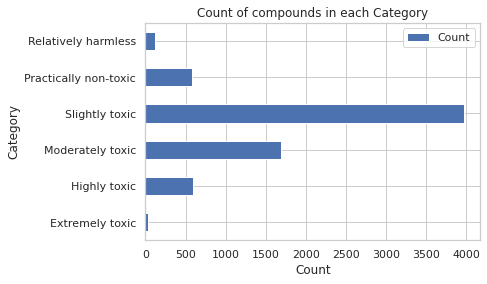

In [48]:
fcb = td_desc.plot.barh(x='Category', y='Count')
fcb1 = plt.xlabel("Count")
fcb2 = plt.title("Count of compounds in each Category")

**Question 2**

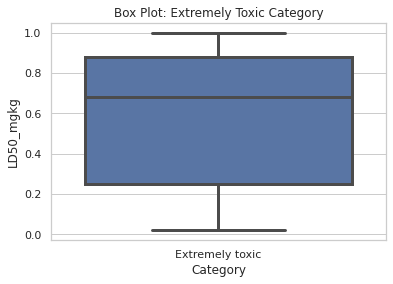

In [49]:
sns.set_theme(style="whitegrid")
bp1 = sns.boxplot(x='Category', y='LD50_mgkg', data=td1, linewidth = 3).set(title = 'Box Plot: Extremely Toxic Category')

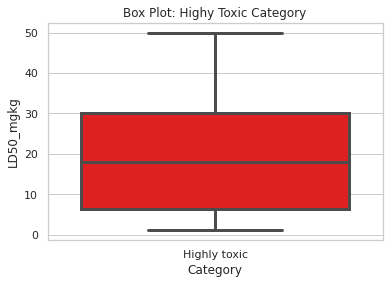

In [50]:
bp2 = sns.boxplot(x='Category', y='LD50_mgkg', data=td2, linewidth = 3, color = 'red').set(title = 'Box Plot: Highy Toxic Category')

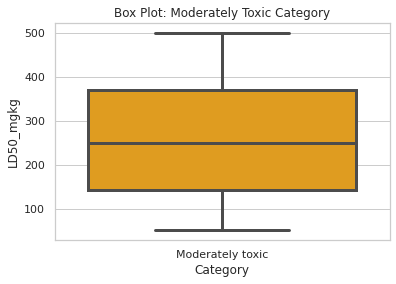

In [51]:
bp3 = sns.boxplot(x='Category', y='LD50_mgkg', data=td3, linewidth = 3, color = 'orange').set(title = 'Box Plot: Moderately Toxic Category')

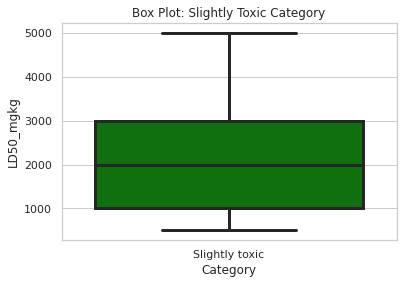

In [52]:
bp4 = sns.boxplot(x='Category', y='LD50_mgkg', data=td4, linewidth = 3, color = 'green').set(title = 'Box Plot: Slightly Toxic Category')

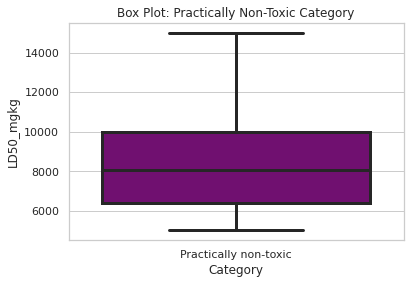

In [53]:
bp5 = sns.boxplot(x='Category', y='LD50_mgkg', data=td5, linewidth = 3, color = 'purple').set(title = 'Box Plot: Practically Non-Toxic Category')

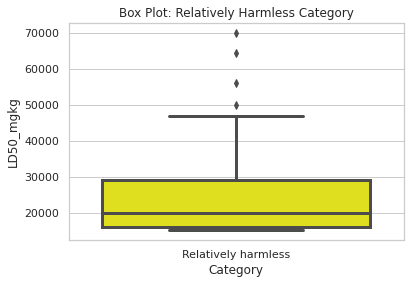

In [54]:
bp6 = sns.boxplot(x='Category', y='LD50_mgkg', data=td6, linewidth = 3, color = 'yellow').set(title = 'Box Plot: Relatively Harmless Category')

**Question 3**

In [55]:
tdc = td
tdc = tdc.drop(columns = ['Category'])

In [56]:
tdc.head()

,LD50_mgkg,XLogP,Mwt,ExactMass,MonoisotopicMass,TPSA,Complexity,FeatureRingCount3D,FeatureHydrophobeCount3D,Charge,...,FeatureCationCount3D,Volume3D,XStericQuadrupole3D,YStericQuadrupole3D,ZStericQuadrupole3D,FeatureCount3D,FeatureAcceptorCount3D,FeatureDonorCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D
0,0.020,6.400000,322.00,321.893590,319.896540,18.5,259,3.0000,0.000000,0,...,0.000000,207.300000,11.270000,2.080000,0.620000,5.0000,2.000000,0.000000,0.600000,0.400000
1,0.100,6.700000,499.77,499.690380,495.694480,18.5,259,3.0000,4.000000,0,...,0.000000,230.400000,12.300000,2.260000,0.640000,9.0000,2.000000,0.000000,0.600000,0.400000
2,0.100,2.500658,100.02,99.993652,99.993652,40.1,37,1.5444,0.563077,0,...,0.398215,178.302572,7.845673,2.396053,1.057695,5.2804,1.774523,0.734092,0.617951,3.710314
3,0.158,-0.100000,339.40,339.168187,339.168187,110.0,543,2.0000,0.000000,0,...,0.000000,255.600000,9.560000,3.020000,1.760000,9.0000,5.000000,2.000000,1.000000,6.800000
4,0.160,7.600000,523.40,522.083060,522.083060,46.5,791,6.0000,1.000000,0,...,0.000000,384.800000,23.640000,5.060000,1.760000,9.0000,1.000000,1.000000,0.800000,3.800000


In [57]:
tdc_cc = tdc.corr()
tdc_cc

,LD50_mgkg,XLogP,Mwt,ExactMass,MonoisotopicMass,TPSA,Complexity,FeatureRingCount3D,FeatureHydrophobeCount3D,Charge,...,FeatureCationCount3D,Volume3D,XStericQuadrupole3D,YStericQuadrupole3D,ZStericQuadrupole3D,FeatureCount3D,FeatureAcceptorCount3D,FeatureDonorCount3D,ConformerModelRMSD3D,EffectiveRotorCount3D
LD50_mgkg,1.000000,0.014839,0.084531,0.084864,0.084994,0.150694,0.095487,0.010126,0.035466,-0.040114,...,-0.038927,0.031858,0.052076,-0.003281,-0.000262,0.136903,0.163024,0.134810,0.052971,0.046477
XLogP,0.014839,1.000000,0.506317,0.506128,0.505787,-0.206835,0.299400,0.368611,0.262433,0.023879,...,-0.047044,0.537170,0.391623,0.415699,0.379335,0.030671,-0.208738,-0.253055,0.356016,0.234655
Mwt,0.084531,0.506317,1.000000,0.999983,0.999975,0.469374,0.839197,0.588440,0.133108,0.004293,...,0.167755,0.821688,0.576558,0.620484,0.582207,0.540961,0.325524,0.140918,0.613601,0.444033
ExactMass,0.084864,0.506128,0.999983,1.000000,0.999991,0.469879,0.839518,0.588730,0.133337,0.004267,...,0.167790,0.821817,0.576853,0.620447,0.582125,0.541491,0.325937,0.141274,0.613852,0.444338
MonoisotopicMass,0.084994,0.505787,0.999975,0.999991,1.000000,0.470866,0.840319,0.589418,0.132427,0.004247,...,0.168244,0.822334,0.577547,0.620877,0.582243,0.542146,0.326687,0.141694,0.614668,0.445225
TPSA,0.150694,-0.206835,0.469374,0.469879,0.470866,1.000000,0.569422,0.231103,-0.138292,-0.081771,...,0.167418,0.360002,0.289097,0.264881,0.195451,0.569025,0.593730,0.420099,0.349569,0.294742
Complexity,0.095487,0.299400,0.839197,0.839518,0.840319,0.569422,1.000000,0.700843,-0.042687,-0.006455,...,0.174720,0.800235,0.580860,0.578706,0.513918,0.644255,0.489194,0.201800,0.584632,0.375902
FeatureRingCount3D,0.010126,0.368611,0.588440,0.588730,0.589418,0.231103,0.700843,1.000000,-0.193149,0.024523,...,0.327159,0.761719,0.545205,0.569672,0.424987,0.628706,0.282265,0.161215,0.421576,0.136164
FeatureHydrophobeCount3D,0.035466,0.262433,0.133108,0.133337,0.132427,-0.138292,-0.042687,-0.193149,1.000000,0.008252,...,-0.138466,0.078395,0.073742,0.029879,0.119890,0.068140,-0.155584,-0.093843,0.150088,0.223314
Charge,-0.040114,0.023879,0.004293,0.004267,0.004247,-0.081771,-0.006455,0.024523,0.008252,1.000000,...,0.047461,0.016246,0.017250,0.005266,0.008415,-0.063165,-0.120573,0.003884,-0.000033,0.001278


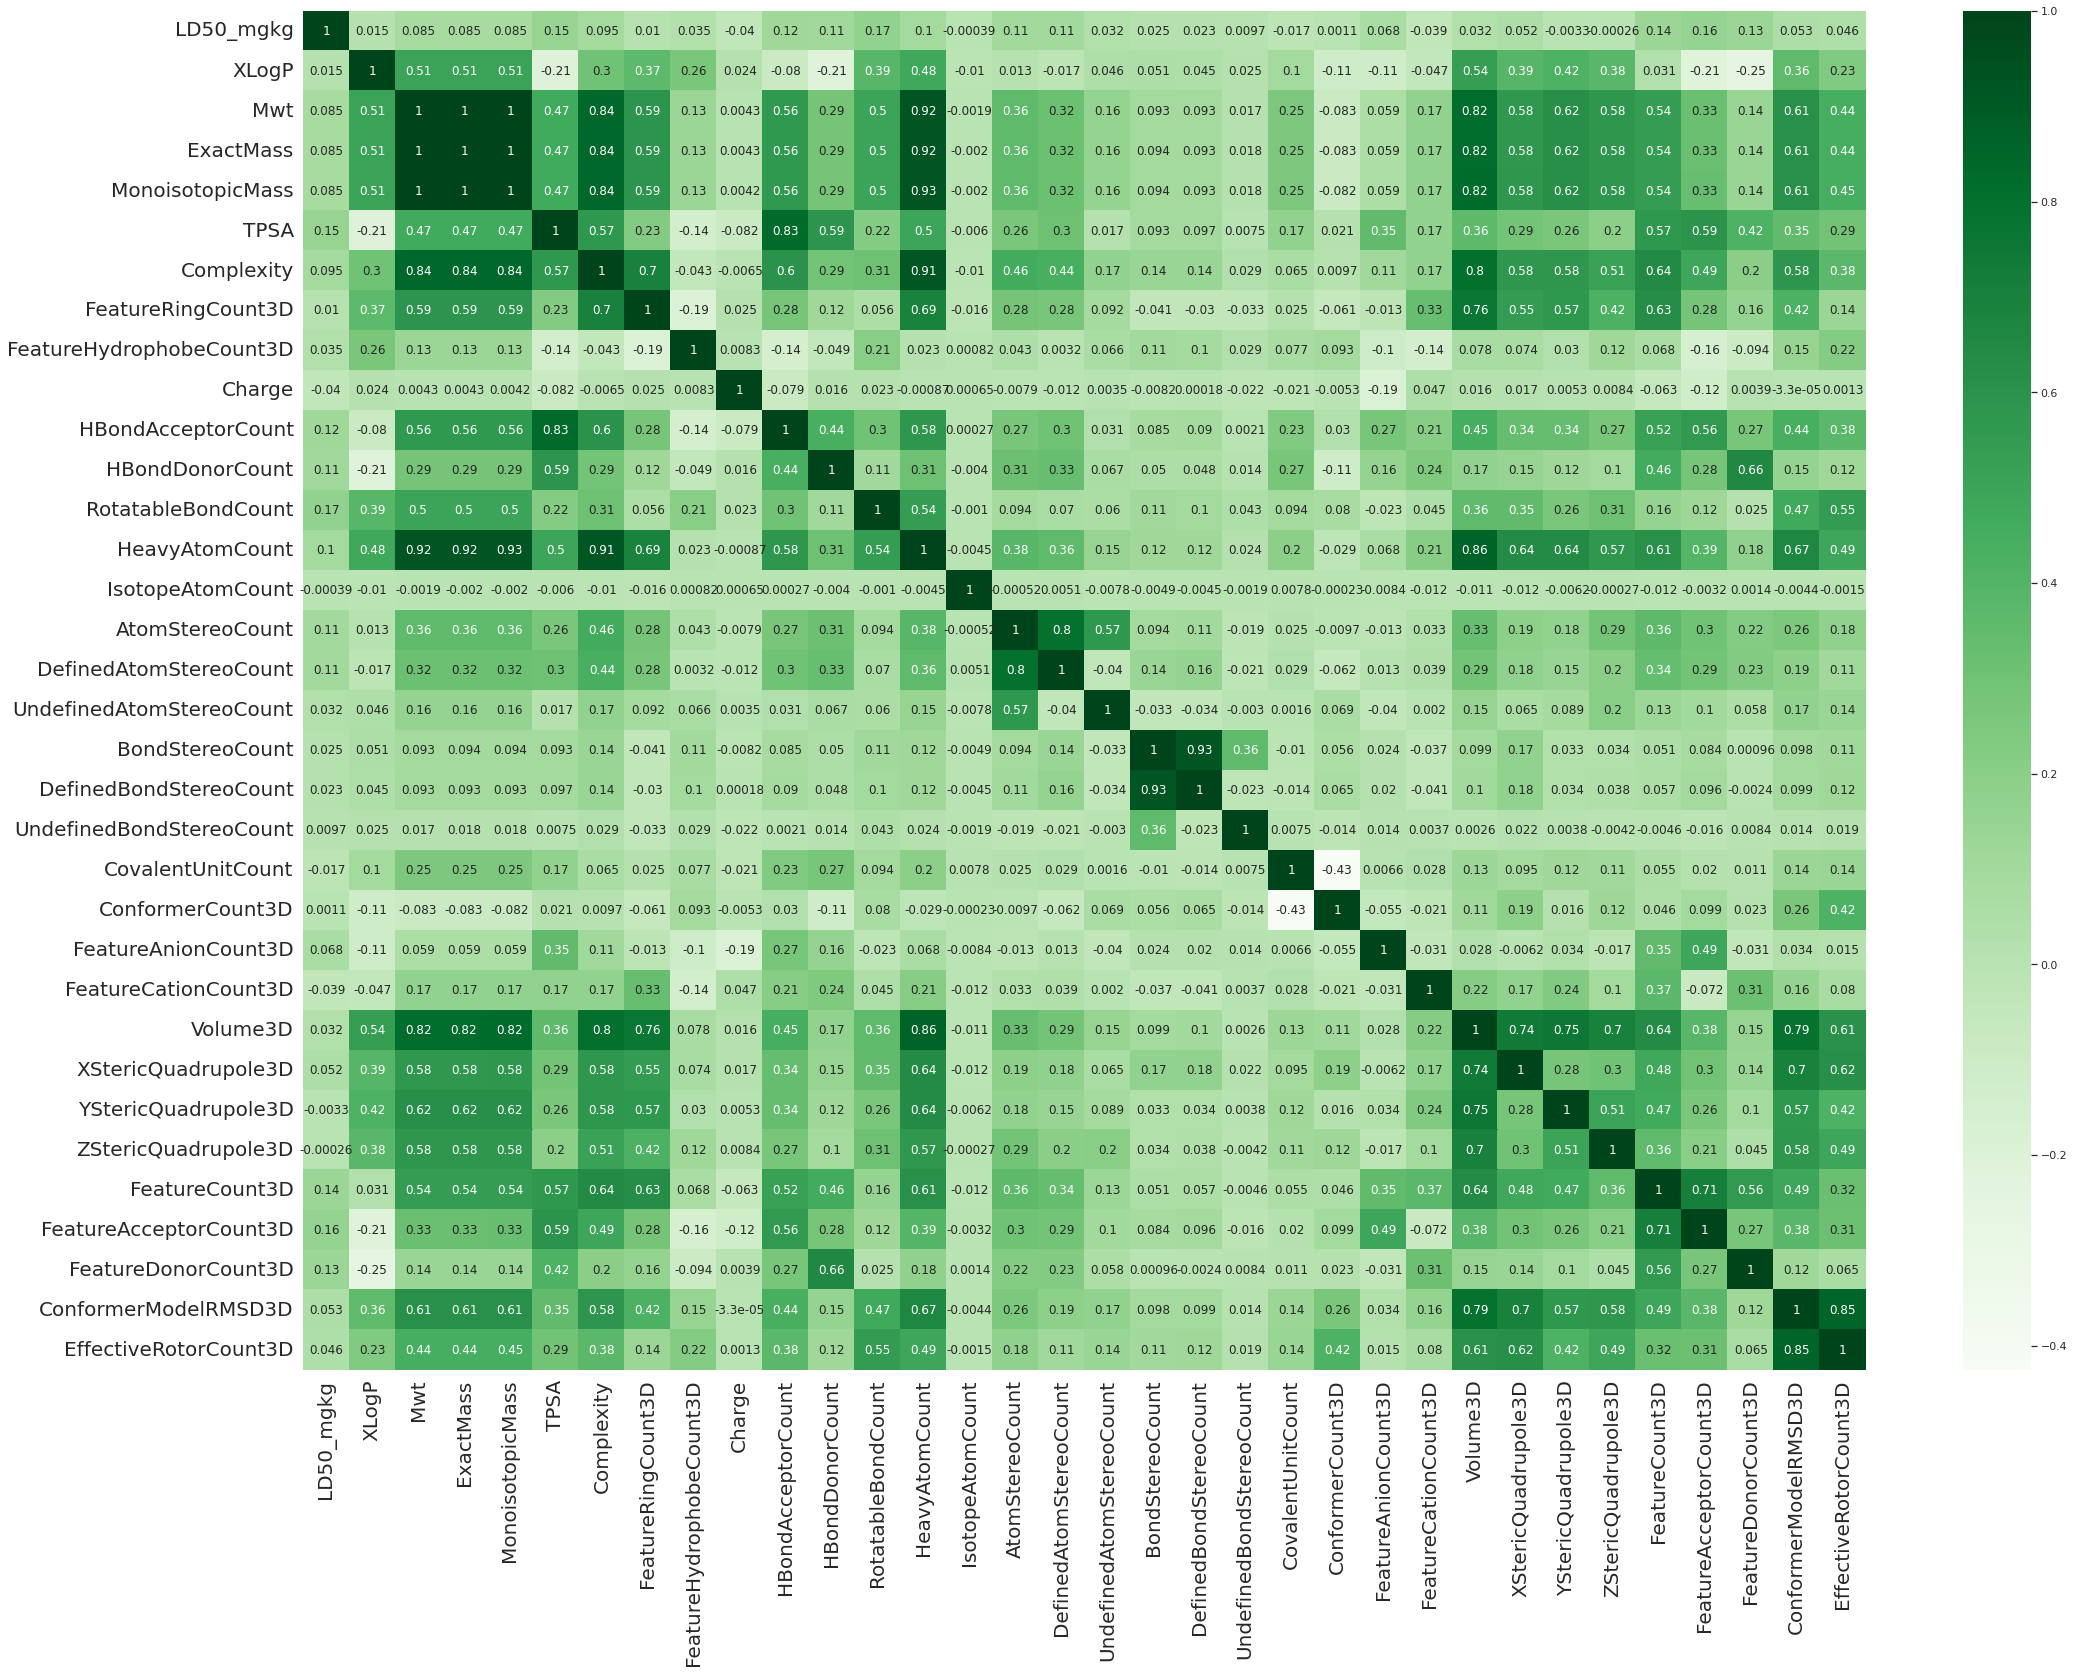

In [58]:
plt.figure(figsize=[35,25])
g = sns.heatmap(tdc_cc, annot= True, cmap="Greens")
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 20)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 20)
plt.show()

**Bar Graph for showing correlation coefficient between target variable (LD50) and predictor variables**

In [59]:
ax = tdc_cc[['LD50_mgkg']]
ax = ax.drop("LD50_mgkg", axis=0)
ax.sort_values(by = 'LD50_mgkg', inplace = True)

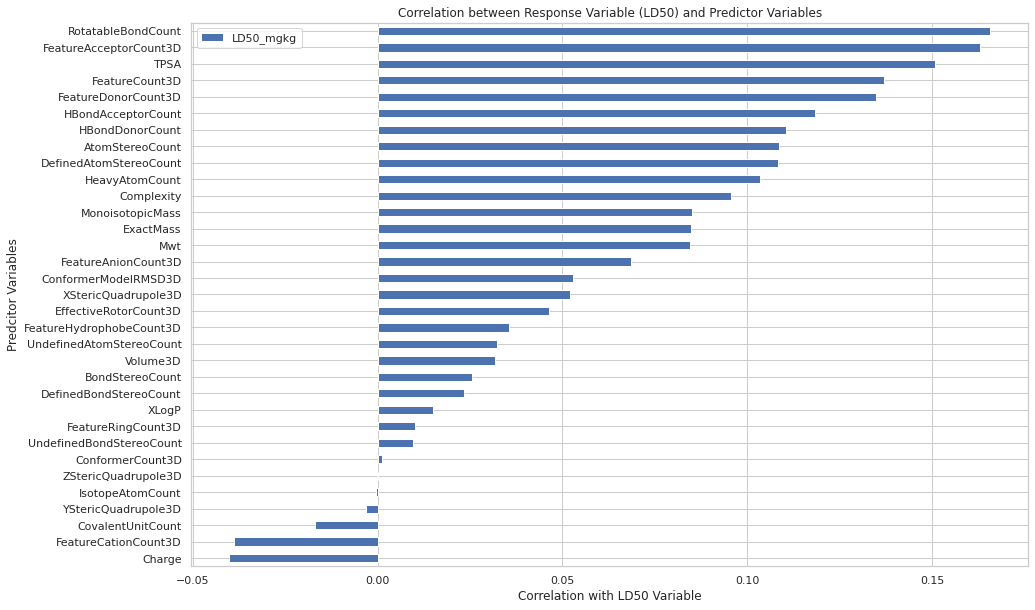

In [60]:
cb = ax.plot.barh(y='LD50_mgkg', figsize = (15,10))
cb1 = plt.xlabel("Correlation with LD50 Variable")
cb1 = plt.ylabel("Predcitor Variables")
cb2 = plt.title("Correlation between Response Variable (LD50) and Predictor Variables")

**Question 4**

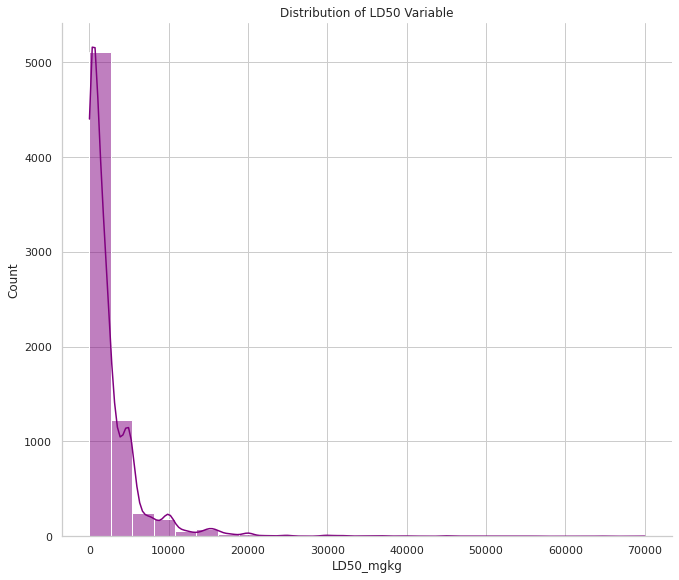

In [61]:
ldh = sns.displot(data = tdc, x = "LD50_mgkg", bins = 26, kde = True, color = 'purple', height = 8, aspect = 1.2).set(title = 'Distribution of LD50 Variable')
ldh2 = ldh.set_axis_labels("LD50_mgkg","Count")

## **Part III**

**Question 1**

In [62]:
y = pd.DataFrame(tdc['LD50_mgkg'])
x = tdc.drop(columns = ["LD50_mgkg"], inplace = False, axis = 1)

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Fitting Multi linear Regression model to the data


In [64]:
MLR = LinearRegression()
MLR.fit(x_train,y_train)

LinearRegression()

In [65]:
y_predicted = MLR.predict(x_test)

In [66]:
RFM = RandomForestRegressor(n_estimators = 700,max_depth=50, min_samples_leaf = 2, min_samples_split= 2, max_features="sqrt", random_state = 42)
RFM.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=700, random_state=42)

Predicting LD50 values for compounds in test datset

In [67]:
y_predicted1 =  RFM.predict(x_test)

Calculating Root mean square error 

In [68]:
mse=mean_squared_error(y_test, y_predicted)
rmse=np.sqrt(mse); rmse

4109.551368180215

Calculating R-sqaured value

In [69]:
print(r2_score(y_test, y_predicted))

0.04296362826281441


Calculating Root mean square error 

In [70]:
mse = mean_squared_error(y_test, y_predicted1)
rmse = np.sqrt(mse); rmse

3957.4514792757323

Calculating R-squared value

In [71]:
print(r2_score(y_test, y_predicted1))

0.11249498818820747


Classifying the compounds into the given categories

In [72]:
tda = y_test.copy(deep = True)
tda['y_predicted'] = y_predicted
tda.columns = ['LD50_actual', 'LD50_predicted']

In [73]:
conditions = [
              (tda['LD50_predicted'] <= 1), 
              (tda['LD50_predicted'] > 1) & (tda['LD50_predicted'] <= 50), 
              (tda['LD50_predicted'] > 50) & (tda['LD50_predicted'] <= 500), 
              (tda['LD50_predicted'] > 500) & (tda['LD50_predicted'] <= 5000),
              (tda['LD50_predicted'] > 5000) & (tda['LD50_predicted'] <= 15000),
              (tda['LD50_predicted'] > 15000)
              ]
values = ['Extremely toxic', 'Highly toxic', 'Moderately toxic', 'Slightly toxic', 'Practically non-toxic', 'Relatively harmless']
tda['Predicted Category'] = np.select(conditions, values)

In [74]:
conditions = [
              (tda['LD50_actual'] <= 1), 
              (tda['LD50_actual'] > 1) & (tda['LD50_actual'] <= 50), 
              (tda['LD50_actual'] > 50) & (tda['LD50_actual'] <= 500), 
              (tda['LD50_actual'] > 500) & (tda['LD50_actual'] <= 5000),
              (tda['LD50_actual'] > 5000) & (tda['LD50_actual'] <= 15000),
              (tda['LD50_actual'] > 15000)
              ]
values = ['Extremely toxic', 'Highly toxic', 'Moderately toxic', 'Slightly toxic', 'Practically non-toxic', 'Relatively harmless']
tda['Category'] = np.select(conditions, values)

In [75]:
conditions = [
              (tda['Category'] == tda['Predicted Category']), 
              (tda['Category'] != tda['Predicted Category']), 
              ]
values = [1, 0]
tda['Score'] = np.select(conditions, values)

In [76]:
Accuracy = 100*(tda['Score'].sum())/(len(tda['Score']))
print(Accuracy)

55.785714285714285


**Actual LD50 values vs Predicted LD50 values scatter plot**



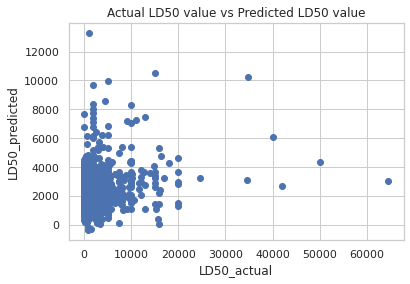

In [77]:
plt.scatter(x = tda["LD50_actual"], y = tda["LD50_predicted"])
fcb1 = plt.xlabel("LD50_actual")
fcb2 = plt.ylabel("LD50_predicted")
fcb3 = plt.title("Actual LD50 value vs Predicted LD50 value")
plt.show()